# Assimilation
## ICESat-2 Hackweek 2020
### Team Members: Debmita Bandyopadhyay, Friedrich Knuth, Tian Li, Mike Wood, Whyjay Zheng

In this project, we created a collection of simple tools to coregister DEMs with ATL06 data on bare ground.

---
## Step 0: Import the package

To begin, we import modules from our package `simlib` in `Assimilation`

In [1]:
import os
os.chdir('/home/jovyan/Assimilation/')
from simlib import coregistration as cor

---
## Step 1: Create a reference DEM object
In our `coregristration` module, we define a `reference_dem` class to hold information on the DEM to coregister with ICESat-2 points.

For this example, we consider a DEM of Mt. Baker in Washington State in the Continental US. We initiate a reference dem object using the coregistration module:

In [2]:
dem_file_path = '/home/jovyan/shared/data-knuth/reference_dem_clip.tif'
DEM = cor.reference_dem(dem_file_path)

The module contains the x and y coordinates (1-d arrays) of the DEM points, as well as the DEM itself. The module also contains a method to calculate the bounding box of the DEM:

In [3]:
print('x:','   min =',DEM.x.min(),'   max =',DEM.x.min(),'   shape = ',DEM.x.shape)
print('y:','   min =',DEM.y.min(),'   max =',DEM.y.min(),'   shape = ',DEM.y.shape)
print('dem:','   min =',DEM.dem.min(),'   max =',DEM.dem.min(),'   shape = ',DEM.dem.shape)
print('bbox:',DEM.bbox)
print('epsg:',DEM.epsg)

x:    min = 582482.8448944142    max = 582482.8448944142    shape =  (6599,)
y:    min = 5395092.518148141    max = 5395092.518148141    shape =  (8157,)
dem:    min = 909.614    max = 909.614    shape =  (8157, 6599)
bbox: [582482.8448944142, 5395092.518148141, 588510.3221990903, 5402543.276693823]
epsg: 32610


We can visualize this DEM using alongside a basemap for reference:

Text(0.5, 1.0, 'DEM')

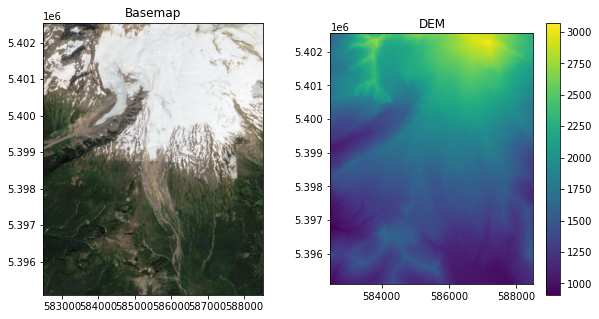

In [4]:
import matplotlib.pyplot as plt
import rasterio
import contextily as ctx

#create a spatial_extent tuple for matplotlib's imshow method
spatial_extent = (DEM.bbox[0],DEM.bbox[2],DEM.bbox[1],DEM.bbox[3]) #imshow uses a different ordering

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,5))

#make a plot of the basemap for reference
url = 'https://mt1.google.com/vt/lyrs=s&x={x}&y={y}&z={z}'
ax1.imshow(DEM.dem, extent=spatial_extent)
ctx.add_basemap(ax1, crs='EPSG:32610', source=url)
ax1.set_title('Basemap')

#make a plot of the DEM
C = ax2.imshow(DEM.dem, extent=spatial_extent)
plt.colorbar(C)
ax2.set_title('DEM')


---
## Step 2: Locate ATL06 data in the DEM domain

To coregister the DEM with ATL06 data, next we query the ATL06 data set to find points with the DEM domain. We developed two methods for this query in our `atl06lib` module. In either case, the `atl06` library returns a `GeoDataFrame` which contains the ATL06 data in the coordinate reference system of the DEM:

#### ATL06 Query Method 1: `icepyx`

In [5]:
# This section will show how the query is done with icepyx
# atl06_overlap_gdf1 = is2.[function name to create the GeoData Frame with bbox input and method keyword]

#### ATL06 Query Method 2: Open Altimetry

In [6]:
# This section will show how the query is done via Open Altimetry
# atl06_overlap_gdf2 = is2.[function name to create the GeoData Frame with bbox input and method keyword]

##### Comparison of methods

note to Tian/Friedrich: my idea for this section is to provide some comparison of the two methods, ideally ending with a side-by-side plot of the data in atl06_overlap_gdf1 and atl06_overlap_gdf2 over the basemap. what else would you like to add to this section?

---
## Step 3: Create a bare rock mask for the DEM

To coregister the DEM with the ATL06 data, we need to identify the points within the DEM domain which correspond to bare rock. For this analyis, we have created a method in the `reference_dem` class which generates the bare rock mask. There are three methods to obtain this mask:

#### Method 1: Mask non-ice areas using polygons in the RGI database

In [7]:
polygon_shapefile = '/home/jovyan/shared/data-whyjay/glims_mtBaker/glims_polygons.shp'
DEM.create_bare_rock_mask(method='RGI',polygon_shapefile=polygon_shapefile)
mask1 = DEM.mask

Creating mask with polygons from the Randolph Glacier Index (0=ice, 1=not ice)


#### Method 2: Mask with the NLCD dataset

In [35]:
# DEM.create_bare_rock_mask(method='NLCD')
# mask2 = DEM.mask

#### Method 3: Mask with snow thickness

In [37]:
# DEM.create_bare_rock_mask(method='CSNOW')
# mask3 = DEM.mask

Note to team: should we provide a side-by-side comparison of the masks in this section? What else ought to go in this section?

#### Mask method comparison

Text(0.5, 1.0, "Mask (method='RGI')")

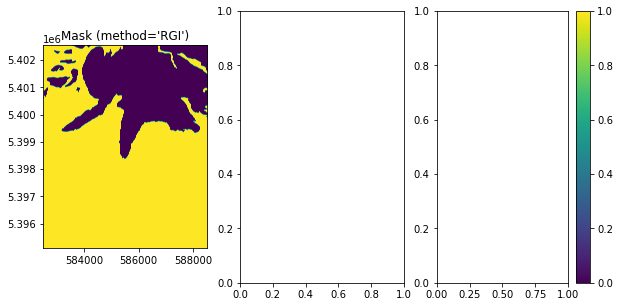

In [8]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(10,5))

C = ax1.imshow(DEM.mask, extent=spatial_extent)
plt.colorbar(C)
ax1.set_title('Mask (method=\'RGI\')')


---
## Step 4: Compare the DEM with ATL06 over bare rock

Note to team: in this section, we show how to use the `colocate_icesat2_dem_points` method to return the DEM vs ATL06 differences using GeoDataFrame provided by the `atl06lib` scripts. The mask can be incorporated here as a method to subset the points to bare ground

---
## Step 5: Preliminary Results

#### Preliminary Result 1: Pentration in snow/firm in radar-derived DEMs in High Mountain Asia

Note to team: do we have time to run this on a HMA example and check out the difference over ice after a height correction has been made to the DEM over bare ground?

#### Preliminary Result 2: Interpolation of ATL06 data

Note to Whyjay: do you want to add an interpolation result here?